<h1>Assignment 1 : Getting Started with CNNs</h1>
<h3>Classifying Fashion with Style!</h3>

<h4>Dataset:</h4>
We'll use the Fashion MNIST dataset, a collection of clothing images labeled with corresponding class labels (e.g., T-shirt, shoe, dress). This dataset is readily available within TensorFlow/PyTorch.

<h4>Assignment Tasks:</h4>

<h4>1. Data Loading and Exploration:</h4>

- Load the Fashion MNIST dataset using TensorFlow/PyTorch.
- Explore the data: understand the image size, number of classes, and visualize some sample images with their corresponding clothing labels.

<h4>2. Data Preprocessing:</h4>

- Pre-process the images for CNN input:
    - Normalize pixel values (convert to range 0-1 or -1 to 1).
    - Reshape the images to a format suitable for CNNs (usually adding a channel dimension).

<h4>3. Building the CNN Model:</h4>

- Design a simple CNN architecture with convolutional layers, pooling layers, and fully-connected layers at the end.
    - Convolutional layers extract features from the images.
    - Pooling layers downsample the data and reduce model complexity.
    - Fully-connected layers learn mappings between features and class probabilities.

<h4>4. Model Training:</h4>

- Split the data into training and testing sets.
- Define an optimizer (e.g., Adam) and a loss function (e.g., categorical cross-entropy) for training the CNN model.
- Train the model for a specified number of epochs (iterations).
- Monitor the training process using techniques like TensorBoard (optional) to visualize training progress and loss curves.

<h4>5. Evaluation and Visualization:</h4>

- Evaluate the model's performance on the testing set using accuracy as a metric.
- Visualize the model's predictions:
    - Display some test images and overlay the predicted clothing labels.
    - Optionally, calculate confusion matrix to understand how well the model classifies each clothing category.

<h4>6. Report:</h4>

- Write a report summarizing your work, including:
    - A brief explanation of CNNs and their role in image classification.
    - Details about the Fashion MNIST dataset.
    - The architecture of your CNN model.
    - Training details and achieved accuracy on the test set.
    - Visualizations of predictions (optional: confusion matrix).
    - Discussion:
        - How well did your model perform?
        - What are some ways to improve the model's accuracy (e.g., hyperparameter tuning, adding more layers)?

## Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
import time
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten , Input , Dropout
from tensorflow.keras.datasets import mnist

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')


## Data Loading and Exploration

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Explore the dataset
print(f"Train images shape: {x_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
Number of classes: 10


In [4]:
x_train.dtype , x_test.dtype

(dtype('uint8'), dtype('uint8'))

In [5]:
print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))

First ten labels training dataset:
 [9 0 0 3 0 2 7 2 5 5]



In [6]:
# Class names for better visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# Check if there are any NaN values
print(f"Missing values in x_train: {np.isnan(x_train).sum()}")
print(f"Missing values in x_test: {np.isnan(x_test).sum()}")

Missing values in x_train: 0
Missing values in x_test: 0


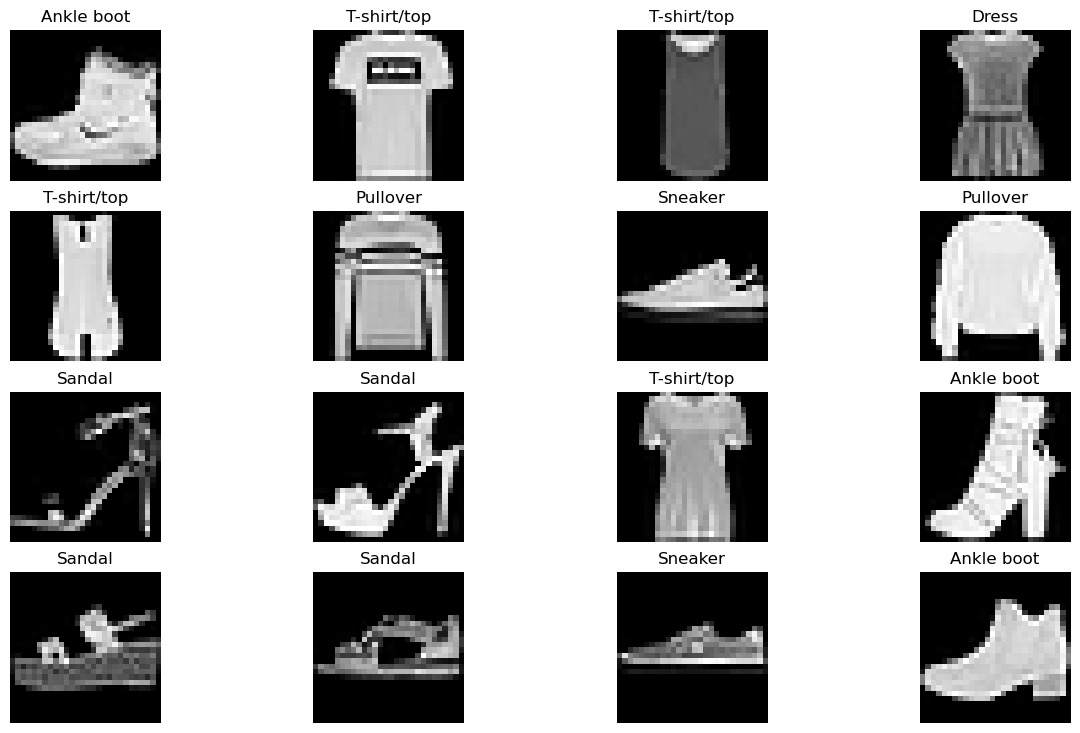

In [8]:
# Visualize some sample images
plt.figure(figsize=(15, 9))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show();

In [9]:
# Unique class labels
unique_classes, counts = np.unique(y_train, return_counts=True)
class_distribution = pd.DataFrame({"Class": unique_classes, "Frequency": counts})
print(class_distribution)

   Class  Frequency
0      0       6000
1      1       6000
2      2       6000
3      3       6000
4      4       6000
5      5       6000
6      6       6000
7      7       6000
8      8       6000
9      9       6000


In [10]:
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")
print(f"Mean pixel value: {x_train.mean()}")
print(f"Standard deviation: {x_train.std()}")

Pixel value range: 0 to 255
Mean pixel value: 72.94035223214286
Standard deviation: 90.02118235130519


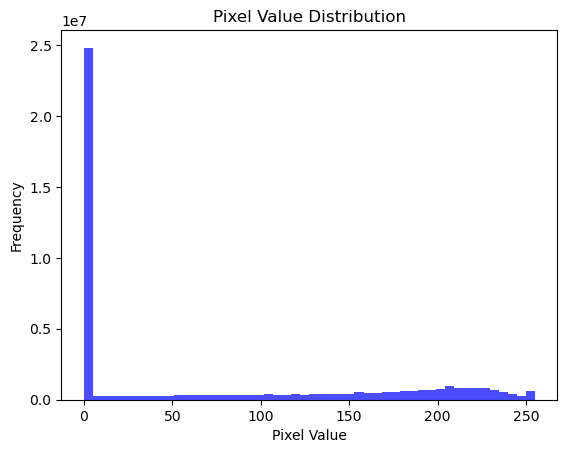

In [11]:
plt.hist(x_train.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show();

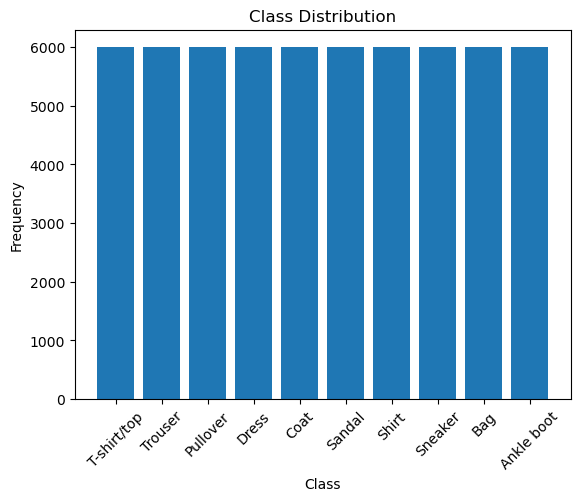

In [12]:
plt.bar(class_names, counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show();

In [13]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

print(f"Normalized pixel value range: {x_train_normalized.min()} to {x_train_normalized.max()}")


Normalized pixel value range: 0.0 to 1.0


## Data Preprocessing

In [14]:
# Flattening the images to a 1 D array:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# Verifying the shape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [15]:
# Normalize from [0:255] => [0.0:1.0]
x_train_norm = np.multiply(x_train_reshaped, 1.0 / 255.0) 
x_test_norm = np.multiply(x_test_reshaped, 1.0 / 255.0) 
     

In [16]:
#Reviewing scaling 
x_train_norm.min() , x_train_norm.max()
x_test_norm.min() , x_test_norm.max() 

(0.0, 1.0)

(0.0, 1.0)

In [17]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid()
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid()
    
    plt.tight_layout()
    plt.show()


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

## Building the CNN Model

In [18]:
X_train, X_val, y_train, y_val = train_test_split(x_train_norm, y_train)
X_test, y_test = x_test_norm, y_test

In [19]:
y_train_encoded = to_categorical(y_train ,num_classes = 10)
y_valid_encoded = to_categorical(y_val ,num_classes = 10)
y_test_encoded = to_categorical(y_test , num_classes = 10)

In [20]:
time_callback = TimeHistory()
X_train_exp = X_train.copy().reshape(X_train.shape[0], 28,28)
X_val_exp = X_val.copy().reshape(X_val.shape[0],28,28)

tf.keras.backend.clear_session()

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters = 56, kernel_size = (3,3), strides = (2,2), activation = ('relu'), padding = 'same')(inputs)
x = layers.MaxPooling2D(1,1)(x)

x = layers.Conv2D(filters = 96, kernel_size = (3,3), strides = (1,1), activation = ('relu'), padding = 'same')(x)
x = layers.MaxPooling2D(1,1)(x)

x = layers.Conv2D(filters = 128, kernel_size = (2,2), strides = (1,1), activation = ('relu'), padding = 'same')(x)
x = layers.MaxPooling2D(1,1)(x)

x = layers.Conv2D(filters = 128, kernel_size = (2,2), strides = (1,1), activation = ('relu'), padding = 'same')(x)
x = layers.AveragePooling2D(2,2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(10 ,activation = 'softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='fashion_mnist_exp')

# For use with non-categorical labels
model.compile(optimizer='rmsprop',           
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model Training

In [21]:
#FITTING, and storing for plotting and call backs
history = model.fit(X_train_exp, y_train, validation_data = (X_val_exp, y_val), epochs=20,  verbose = 1, callbacks = [time_callback])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7616 - loss: 0.6563 - val_accuracy: 0.8482 - val_loss: 0.4058
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8949 - loss: 0.3016 - val_accuracy: 0.8765 - val_loss: 0.3514
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.9038 - loss: 0.2610 - val_accuracy: 0.9080 - val_loss: 0.2679
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.9202 - loss: 0.2290 - val_accuracy: 0.9064 - val_loss: 0.2618
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.9288 - loss: 0.2022 - val_accuracy: 0.9156 - val_loss: 0.2466
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.9314 - loss: 0.1901 - val_accuracy: 0.9107 - val_loss: 0.2503
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.9411 - loss: 0.1676 - val_accuracy: 0.9178 - val_loss: 0.2496
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - accuracy: 0.9462 -

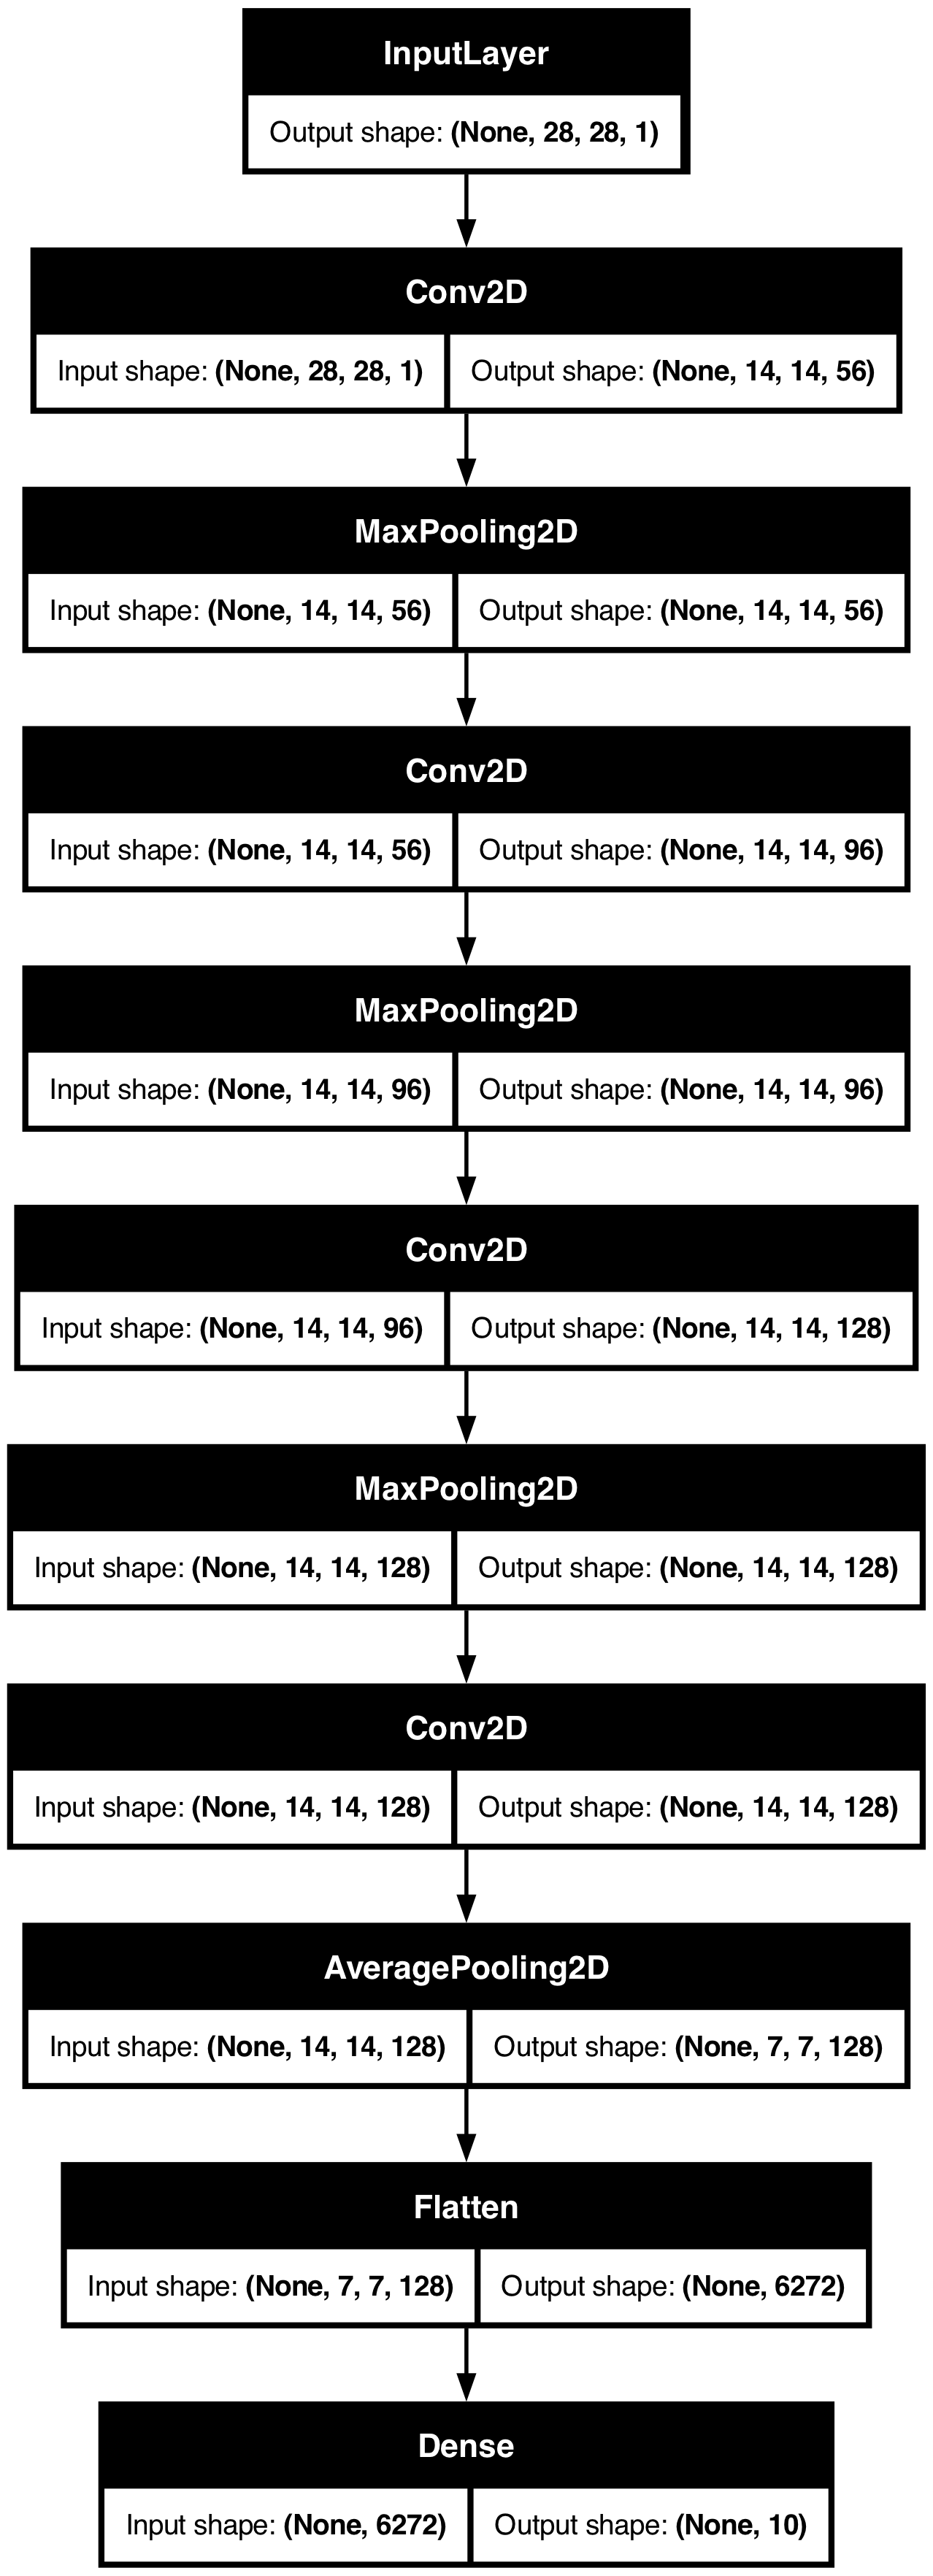

In [22]:
keras.utils.plot_model(model, 'CNN.png', show_shapes=True)

In [23]:
model.summary()

Model: "fashion_mnist_exp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 56)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 56)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 96)     │        48,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 7, 7, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 453,430 (1.73 MB)

 Trainable params: 226,714 (885.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 226,716 (885.61 KB)

## Evaluation and Visualization

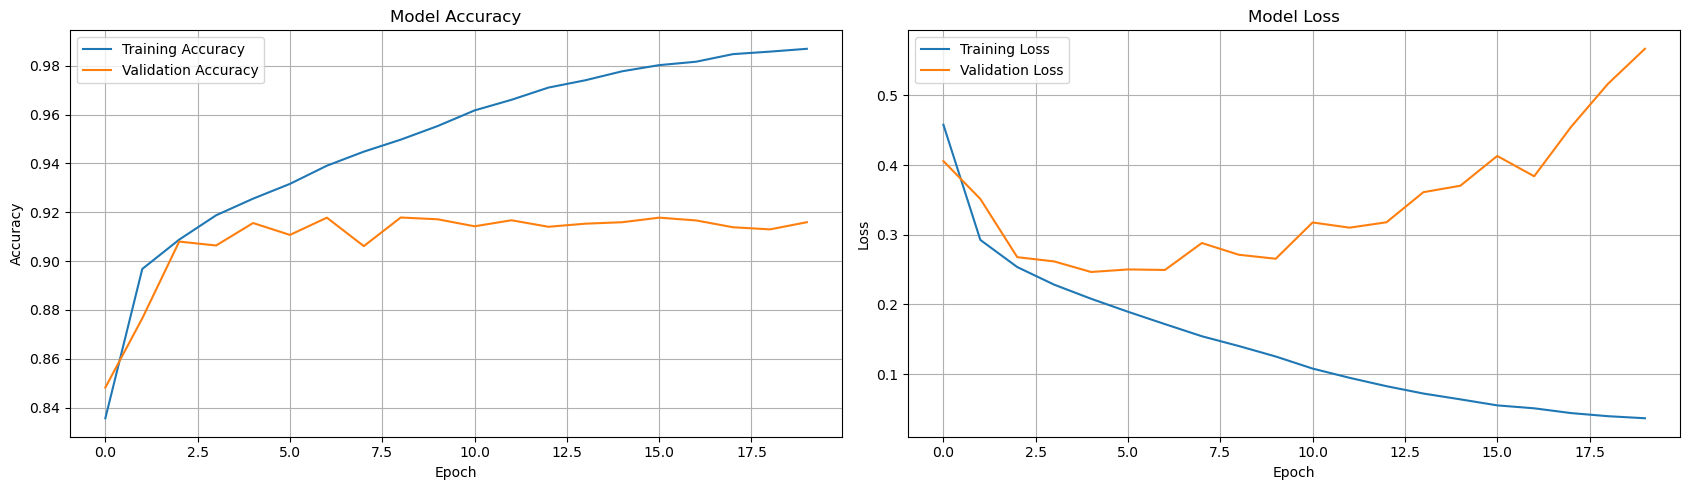

In [24]:
plot_history(history)

In [25]:
exp_test_preds = model.predict(X_test.copy().reshape(X_test.shape[0],28,28))
exp_val_preds = model.predict(X_val.copy().reshape(X_val.shape[0],28,28))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


### Display some test images and overlay the predicted clothing labels.

In [26]:
y_pred = model.predict(X_test.reshape(X_test.shape[0], 28,28), batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print("Overall test Accuracy Score: ", accuracy_score(y_test, y_pred_bool))

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Overall test Accuracy Score:  0.914


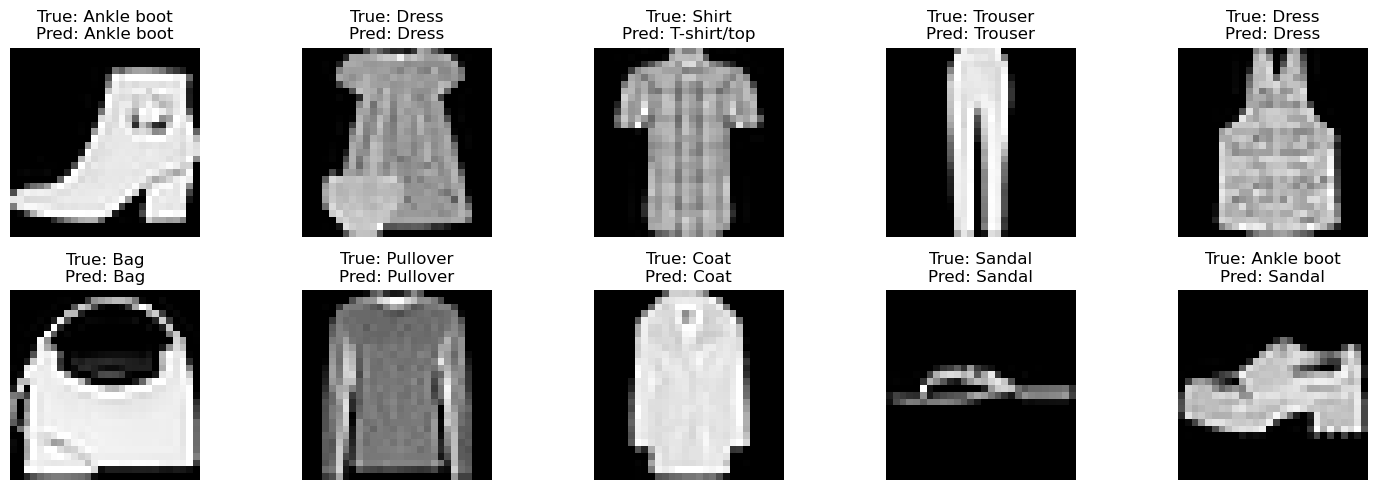

In [27]:
# Select a random sample of test images
num_images = 10  # Number of images to display
indices = np.random.choice(len(X_test), num_images, replace=False)
test_images = X_test[indices].reshape(num_images, 28, 28)
test_labels = y_test[indices]
predicted_labels = y_pred_bool[indices]

# Plot the images with predictions
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    true_label = class_names[test_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show();

In [28]:
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.87      0.88      0.88      1000
           3       0.89      0.94      0.92      1000
           4       0.85      0.88      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.83      0.67      0.74      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



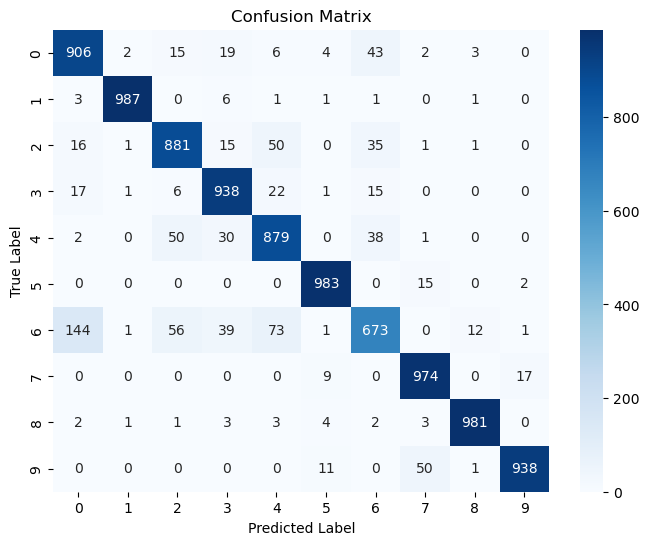

In [29]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bool)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show();